### Water pumping stations of Rotterdam
This file contains code used to generate the figure for day 18 of the 30daymapchallenge.<br><br>

Sources:<br>
- Gamelan data: provided by Gemeente Rotterdam. For more information on gemalen see:<br>
https://www.rotterdam.nl/wonen-leven/rioolgemalen/  
- Map data: https://www.cbs.nl/nl-nl/dossier/nederland-regionaal/geografische-data/wijk-en-buurtkaart-2017  
- Translation to CBS wijk based on: https://nl.wikipedia.org/wiki/Lijst_van_wijken_in_Rotterdam

In [1]:
import pandas as pd
import geopandas
import json
import matplotlib
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

In [2]:
# Read data
wijken = geopandas.read_file("./WijkBuurtkaart_2017_v3/wijk_2017_v3.shp")
gemalen = pd.read_excel("./data/gemalen_data.ods", engine="odf")
wijk_dict = json.load(open("./data/wijk_dict.json"))

In [3]:
# Get Rotterdam wijken
wijken_rotterdam_rd = wijken[wijken['GM_NAAM'] == 'Rotterdam'].copy()
# Drop None
wijken_rotterdam_rd.drop(wijken_rotterdam_rd.index[-1], inplace=True)

In [4]:
# Get gemalen data
status_all = ["Actief gemaal", "Passief Gemaal", "Tunnel gemaal", "Tunnel Gemaal",
              "Bijzondere Objecten", "Centrale verdeelkast"]
active_tunnel_gemalen = gemalen.loc[gemalen.Status.isin(['Actief gemaal', "Tunnel Gemaal"])]

In [5]:
# Preprocessing data
gemalen_wijk_list = active_tunnel_gemalen.Wijk.tolist()
wijk_list_converted = []

# Get list of all wijken
for i in gemalen_wijk_list:
    if i in wijk_dict:
        wijk_list_converted.append(wijk_dict[str(i)])

gemalen_dict = {}
 # Count occurrence of each wijk
for i in wijk_list_converted:
    if i in gemalen_dict:
        gemalen_dict[i] += 1
    else:
        gemalen_dict[i] = 1
    
# Store results
tel = 0
for i in gemalen_dict:
    names = [i for i in gemalen_dict]
    occ = [gemalen_dict[i] for i in gemalen_dict]
    if occ[tel] == 0:
        occ[tel] = 1
        tel += 1
    
# Create dataframe
tmp = {'WK_NAAM': names, "occ": occ}
tmp = pd.DataFrame.from_dict(tmp)

# Merge with geopandas data
total_dataset = pd.merge(wijken_rotterdam_rd, tmp, left_on='WK_NAAM', right_on='WK_NAAM', how='left')
total_dataset = geopandas.GeoDataFrame(total_dataset)
active_tunnel_gemalen_df = total_dataset.fillna(0)

# Correct missing wijken
active_tunnel_gemalen_df.loc[active_tunnel_gemalen_df.WK_NAAM == "Rotterdam-Noord-West", 'occ'] = 2
active_tunnel_gemalen_df.loc[active_tunnel_gemalen_df.WK_NAAM == "Vondelingenplaat", 'occ'] = 1


In [6]:
# Total number of gemalen
occs = active_tunnel_gemalen_df.occ.tolist()
wijken = active_tunnel_gemalen_df.WK_NAAM.tolist()

print(f"Total number of gemalen: {sum(occs)}\n")

for i in range(len(occs)):
    print(f"{wijken[i]} -> {int(occs[i])}")

Total number of gemalen: 926.0

Rotterdam Centrum -> 35
Delfshaven -> 16
Overschie -> 58
Noord -> 10
Hillegersberg-Schiebroek -> 76
Kralingen-Crooswijk -> 119
Feijenoord -> 12
IJsselmonde -> 30
Pernis -> 10
Prins Alexander -> 362
Charlois -> 49
Hoogvliet -> 14
Hoek van Holland -> 66
Spaanse Polder -> 21
Nieuw Mathenesse -> 4
Waalhaven-Eemhaven -> 6
Vondelingenplaat -> 1
Botlek-Europoort-Maasvlakte -> 29
Rotterdam-Noord-West -> 2
Rivium -> 1
Bedrijventerrein Schieveen -> 0
Rozenburg -> 5


<ipython-input-7-87647557407d>:3: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  norm=matplotlib.colors.SymLogNorm(linthresh=1.0, vmin=0.0, vmax=1000))


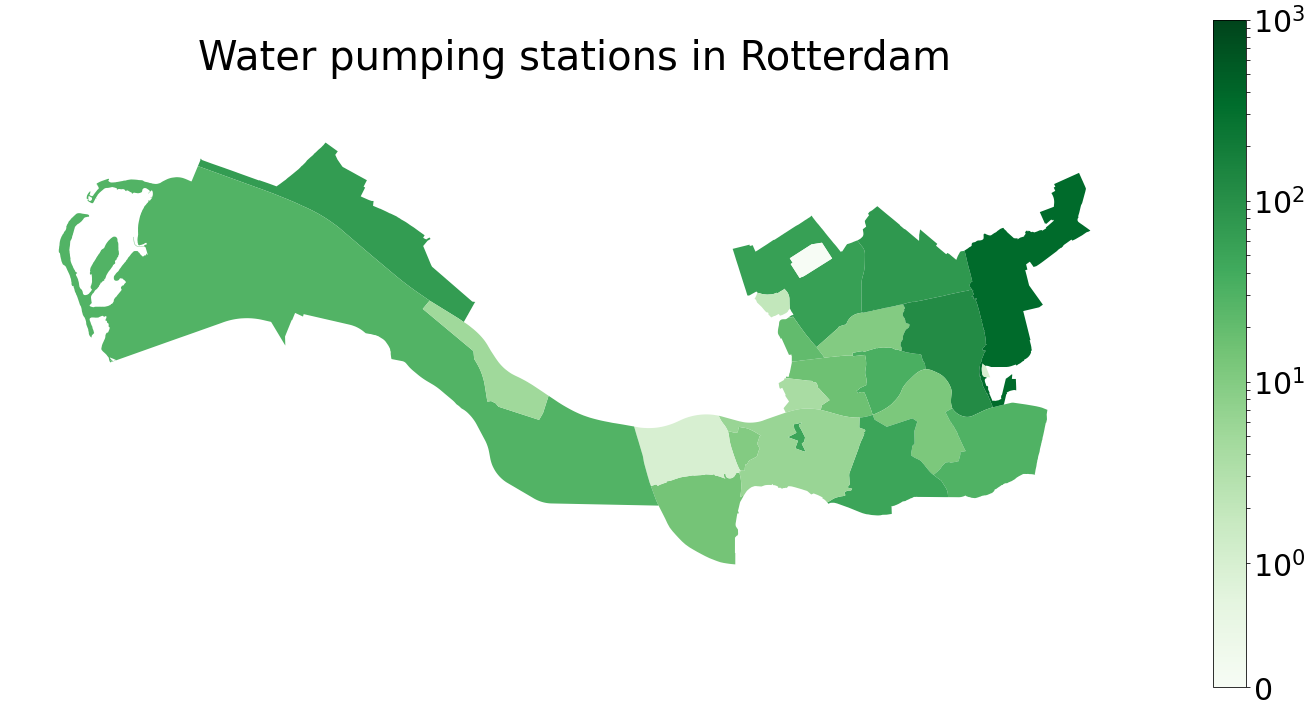

In [7]:
# Plot data
ax = active_tunnel_gemalen_df.plot(figsize=(20,10),  column='occ', cmap="Greens", legend=True,
                norm=matplotlib.colors.SymLogNorm(linthresh=1.0, vmin=0.0, vmax=1000))

# Set title
ax.set_title("Water pumping stations in Rotterdam", size=40, y = 1.1)

# Set axis
ax.set_axis_off()
fig = ax.figure
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=30)

# Save
plt.tight_layout()
plt.savefig('gemalen_rotterdam.jpg')

Wijk: Rotterdam Centrum


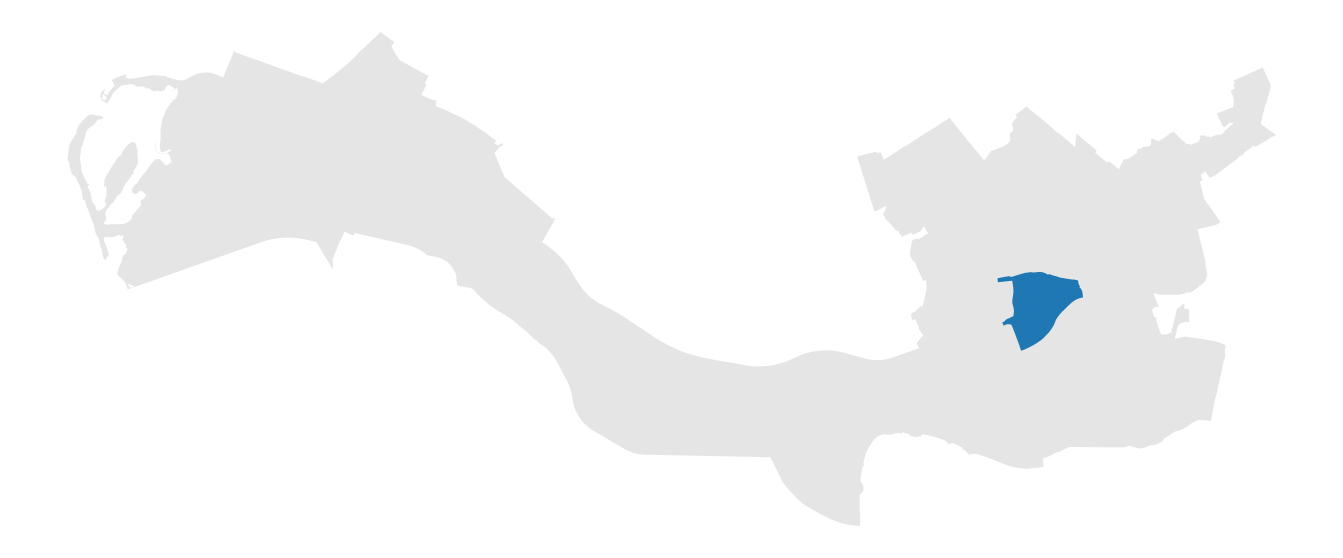

Wijk: Delfshaven


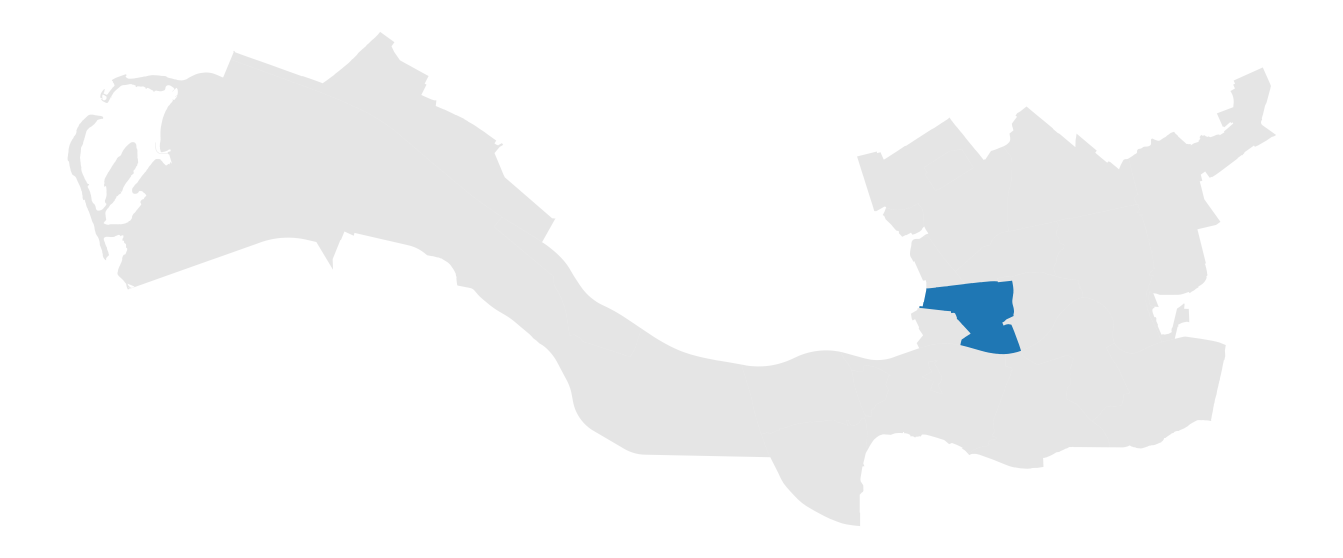

Wijk: Overschie


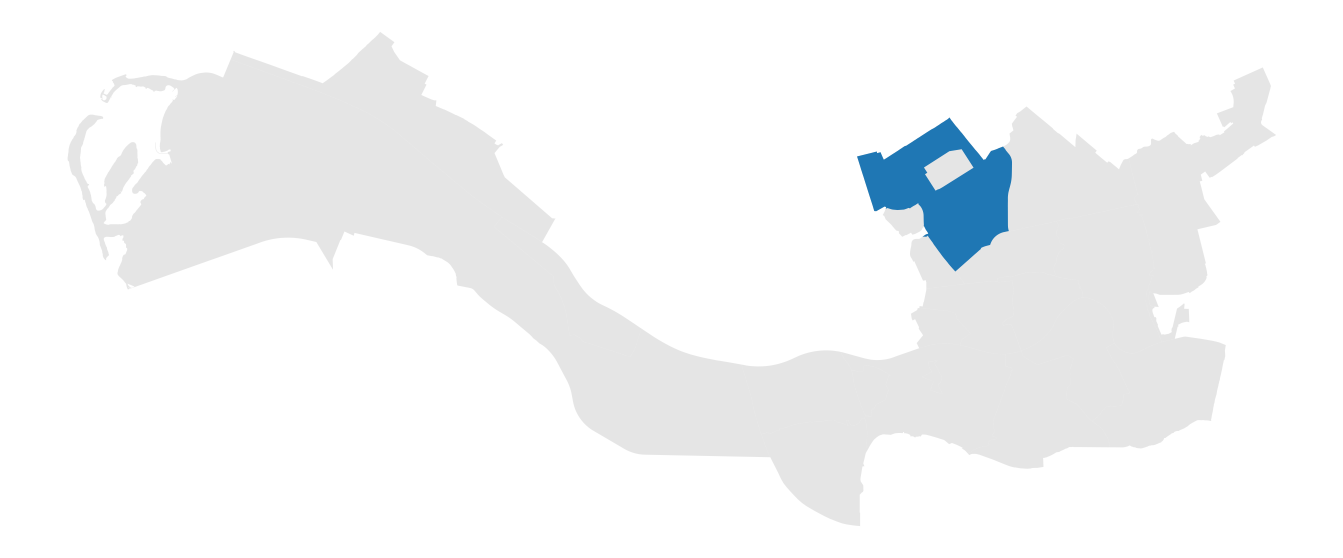

Wijk: Noord


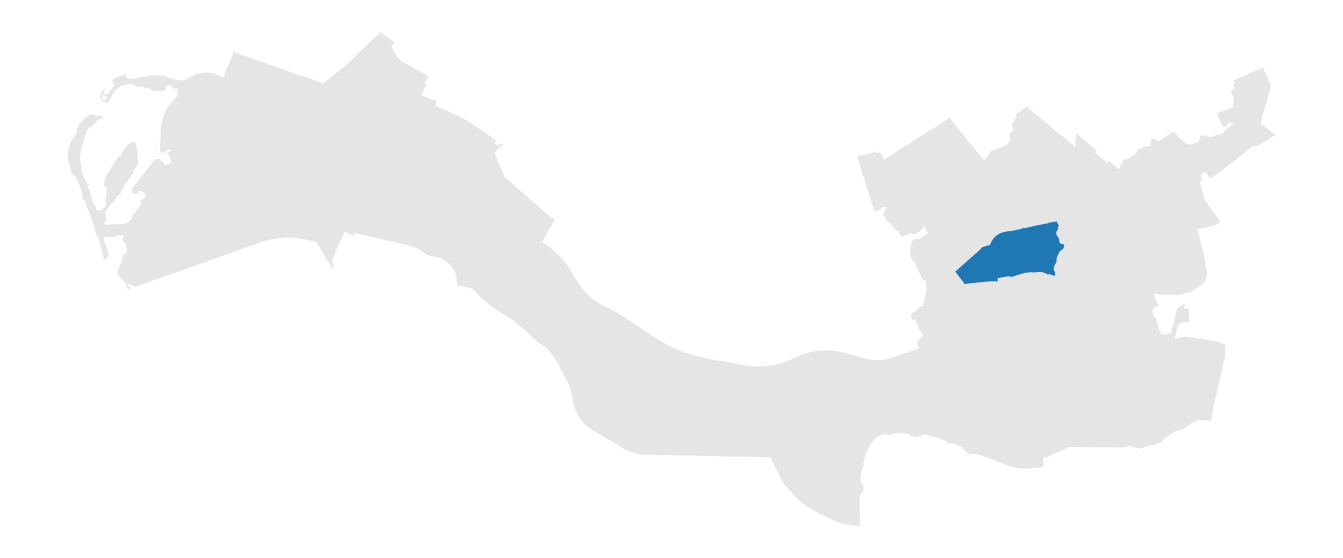

Wijk: Hillegersberg-Schiebroek


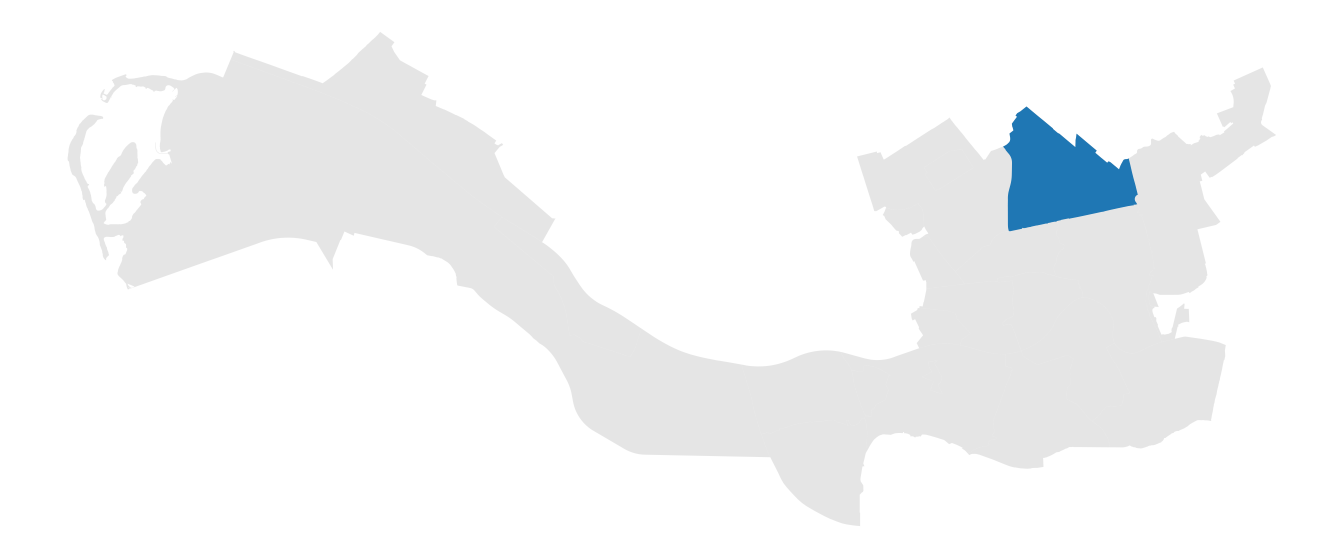

Wijk: Kralingen-Crooswijk


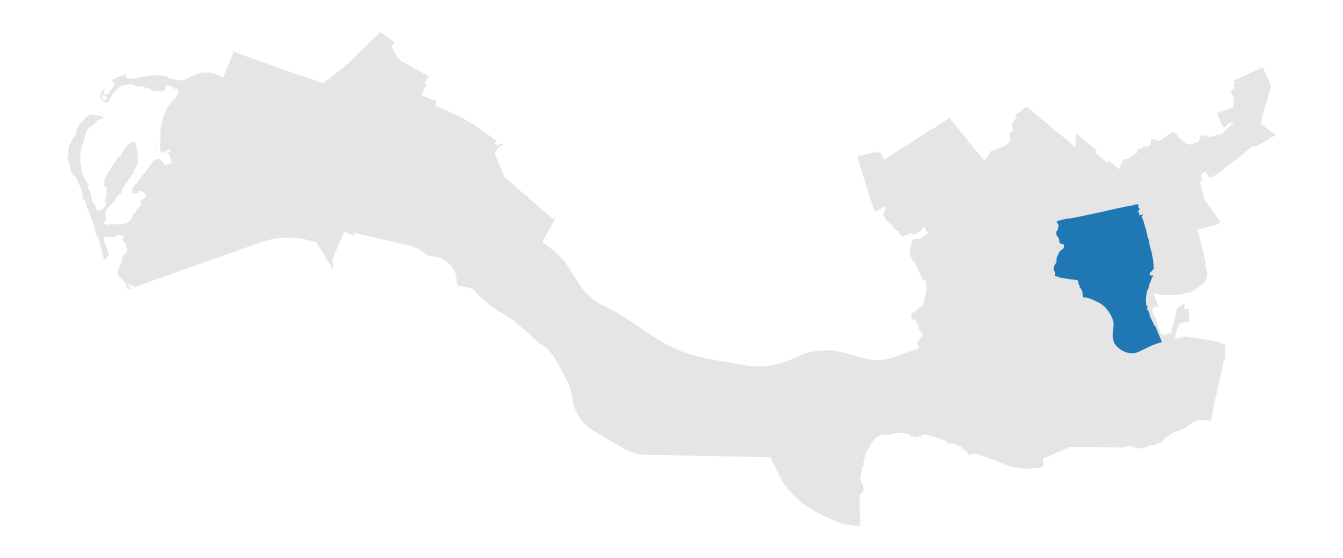

Wijk: Feijenoord


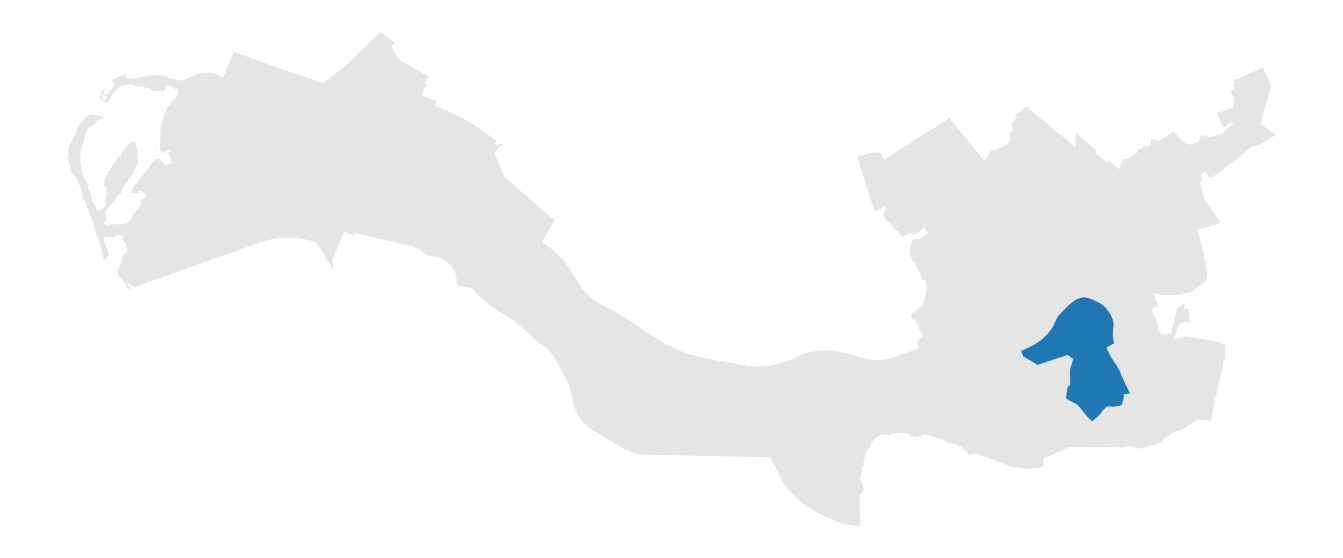

Wijk: IJsselmonde


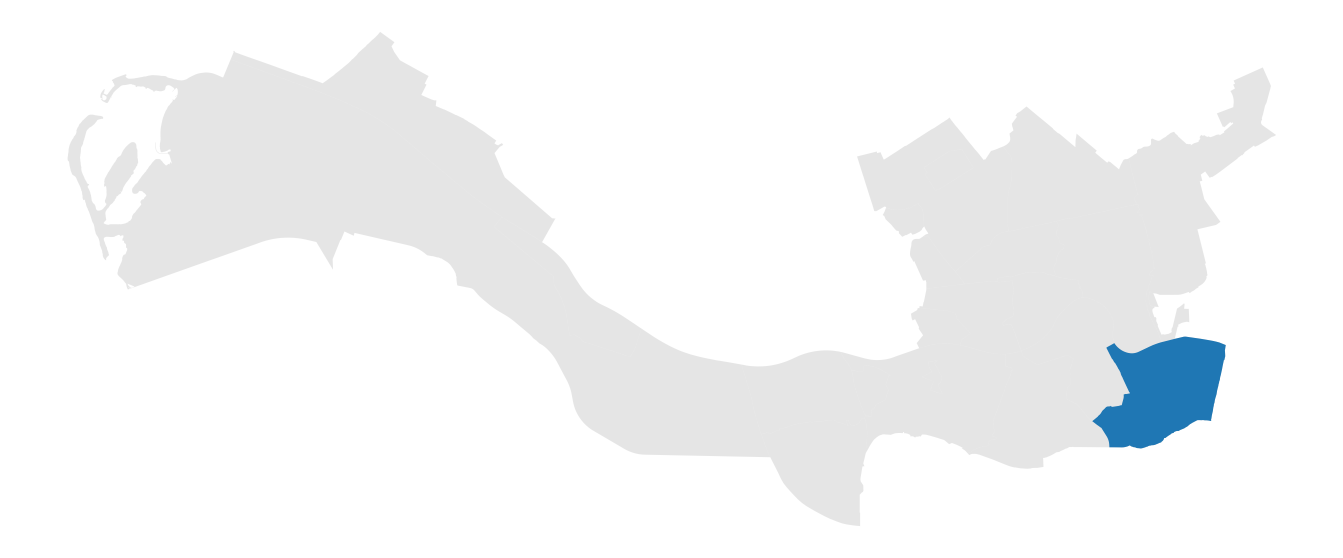

Wijk: Pernis


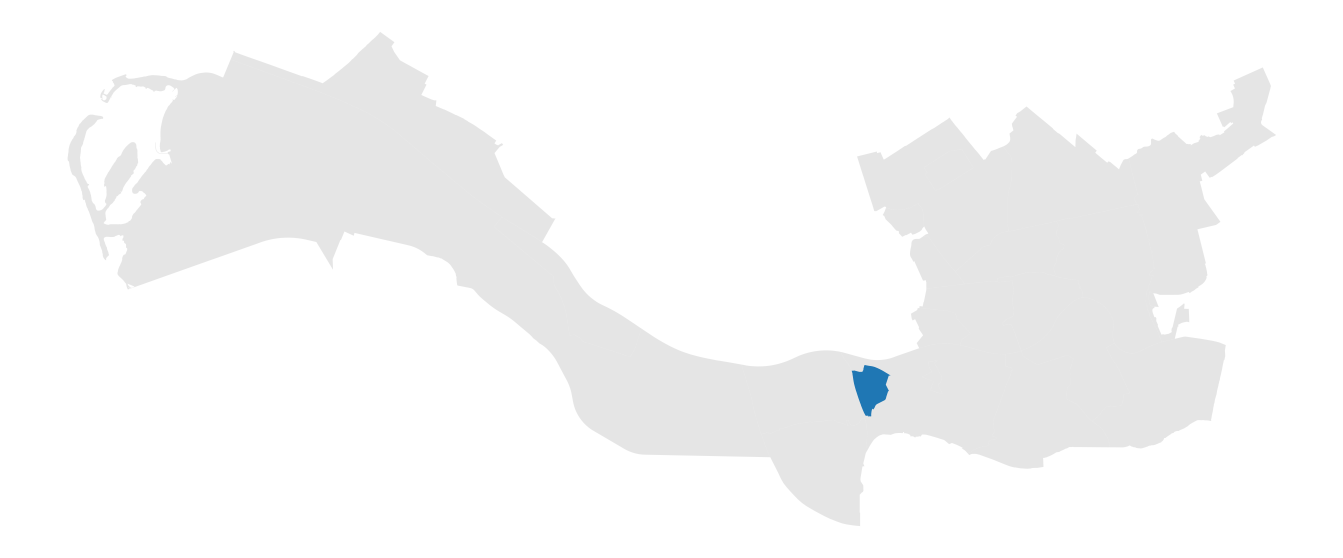

Wijk: Prins Alexander


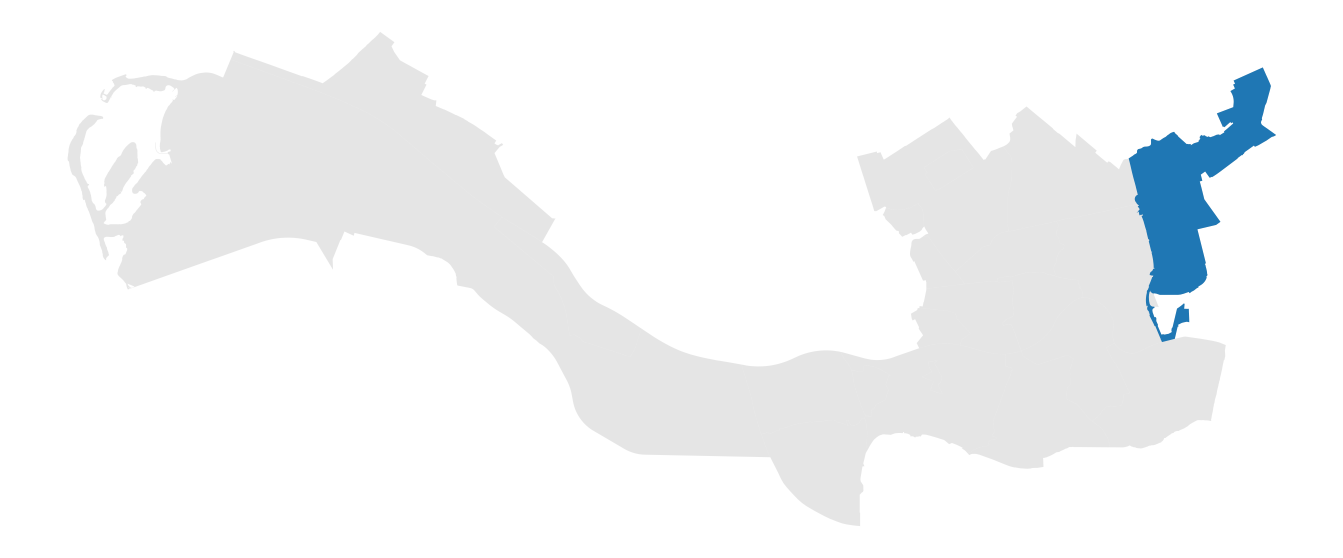

Wijk: Charlois


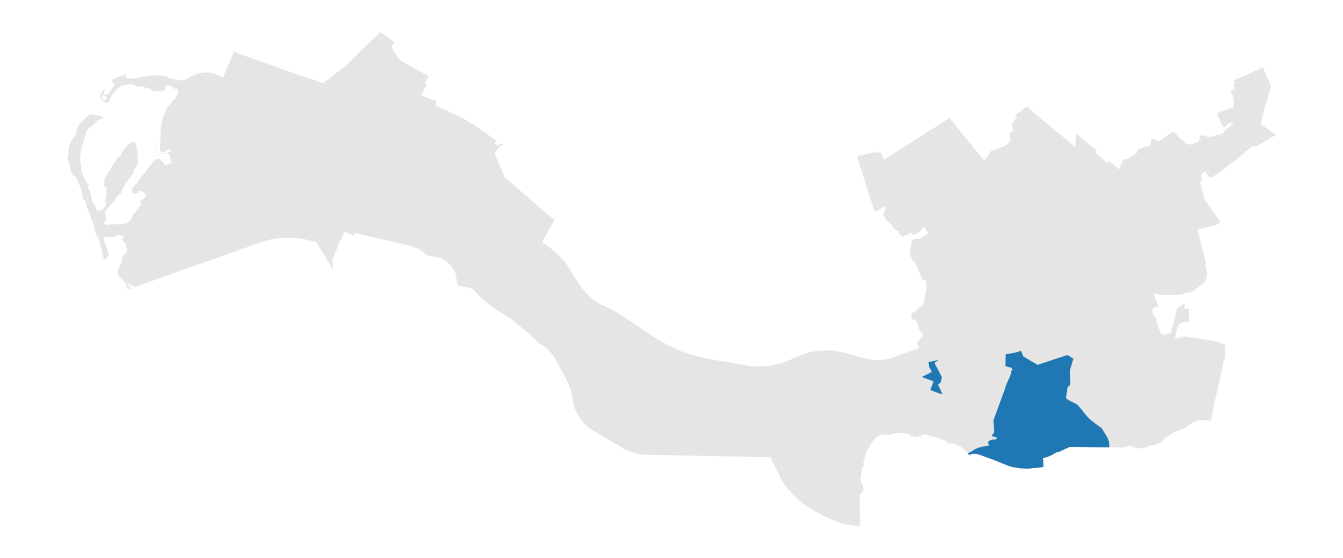

Wijk: Hoogvliet


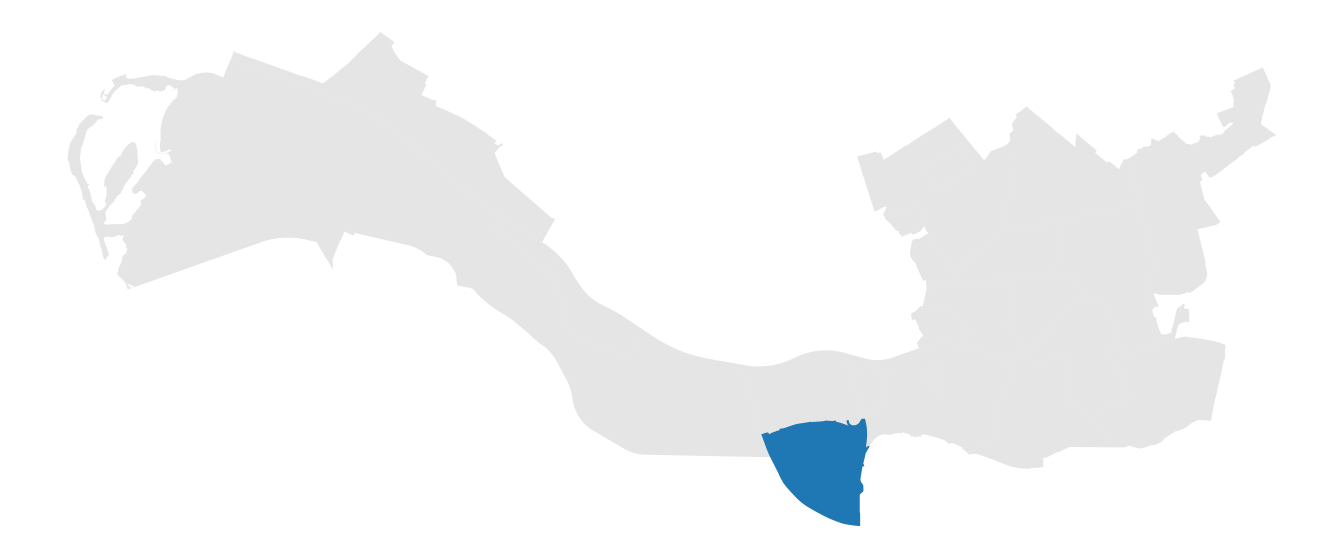

Wijk: Hoek van Holland


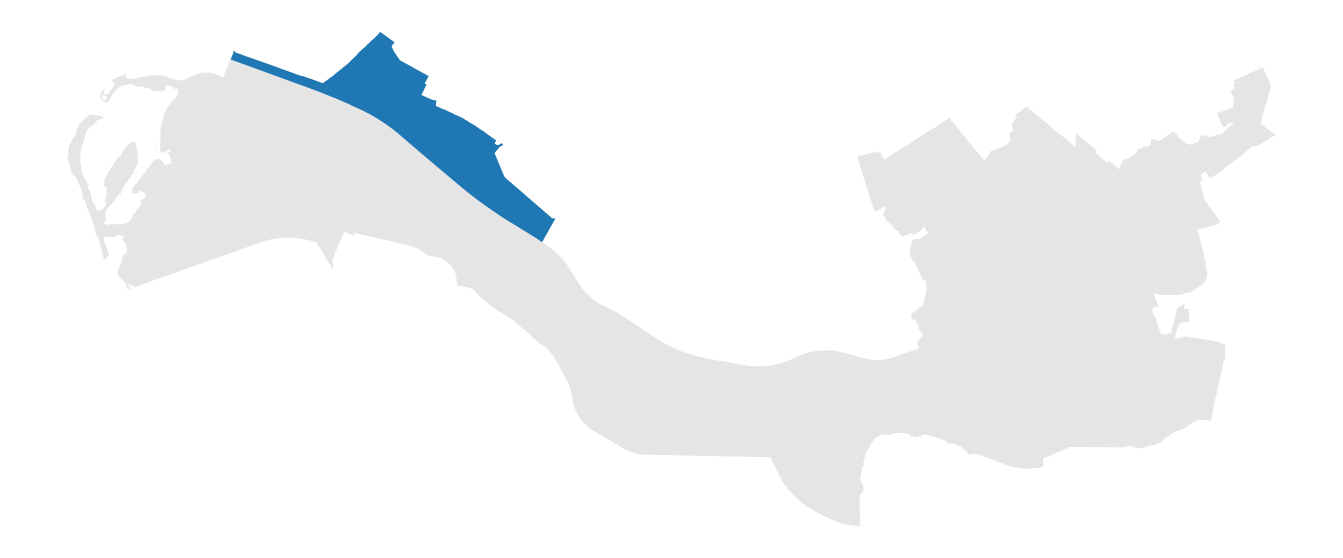

Wijk: Spaanse Polder


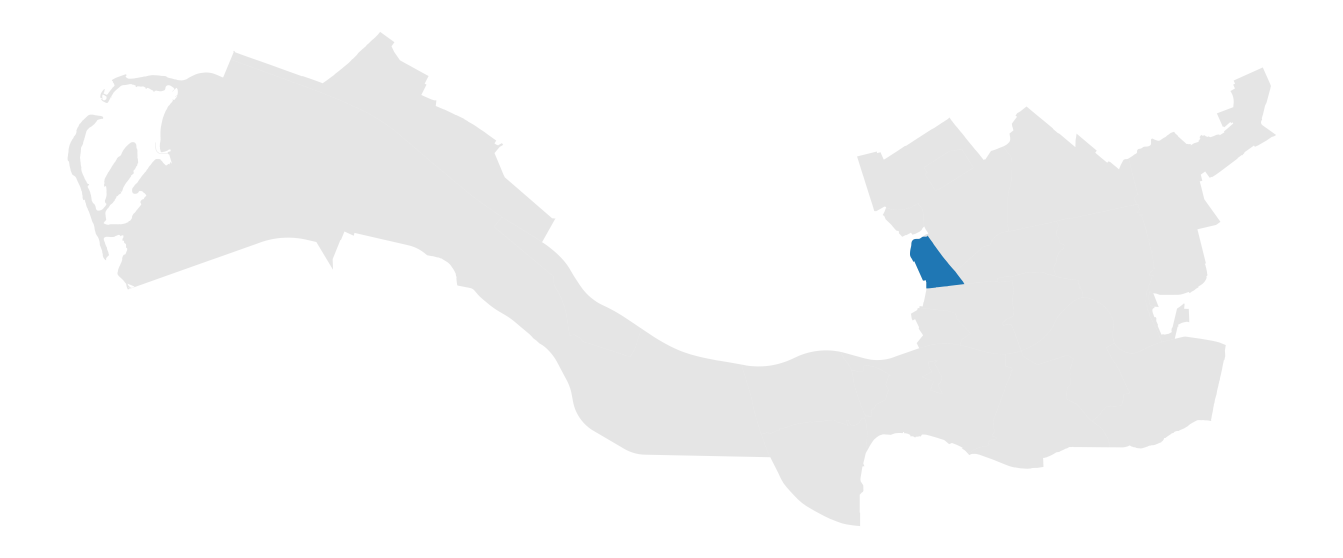

Wijk: Nieuw Mathenesse


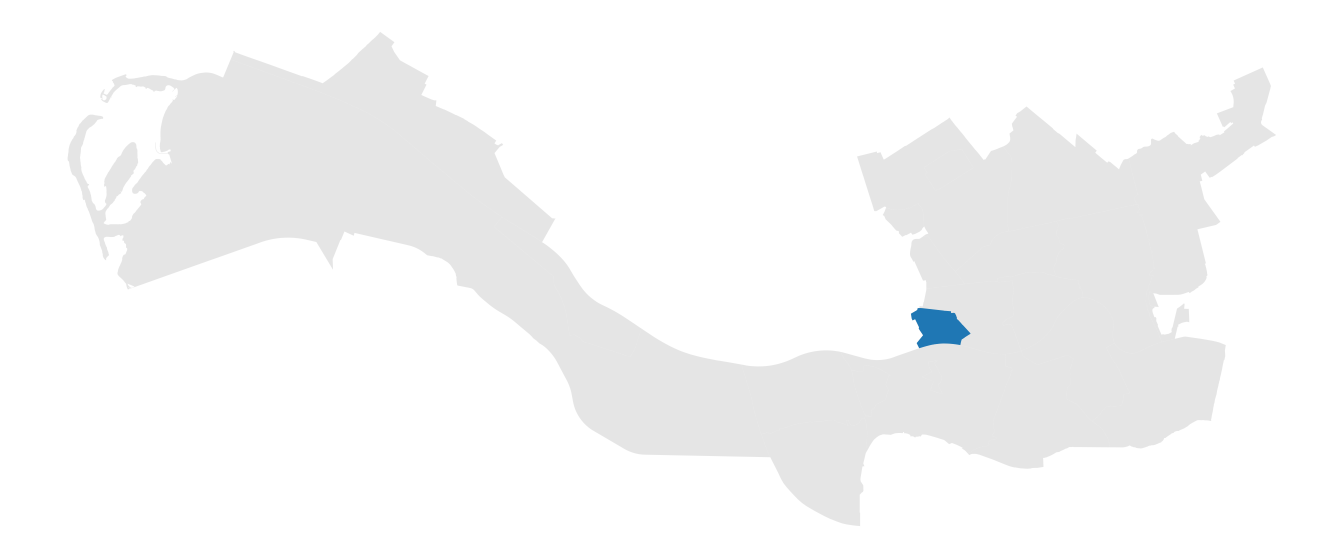

Wijk: Waalhaven-Eemhaven


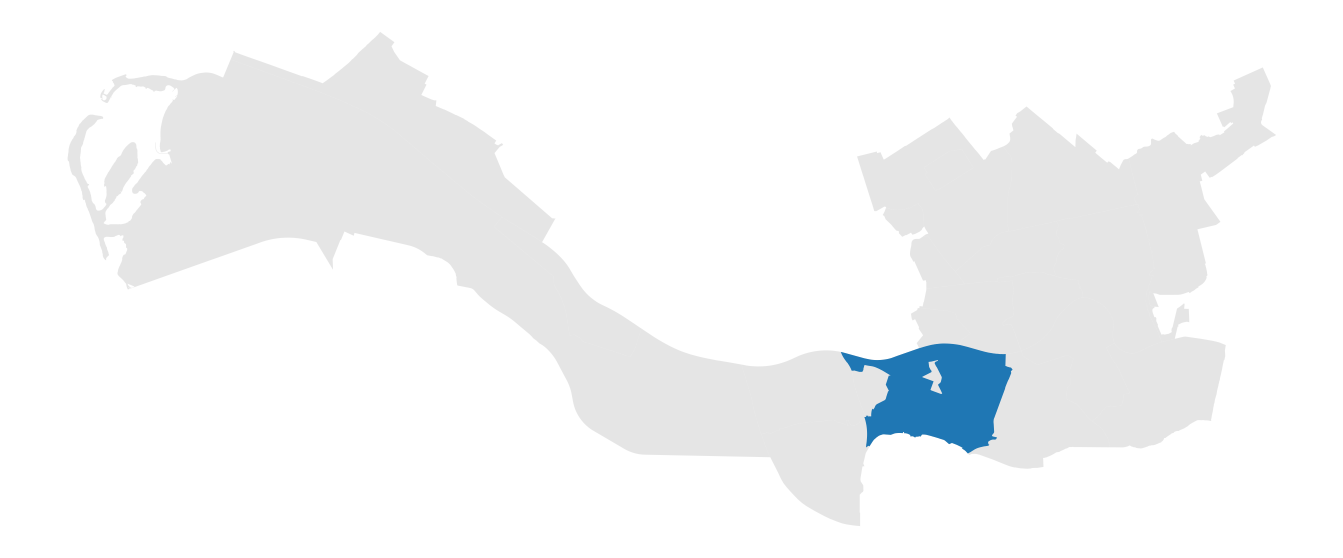

Wijk: Vondelingenplaat


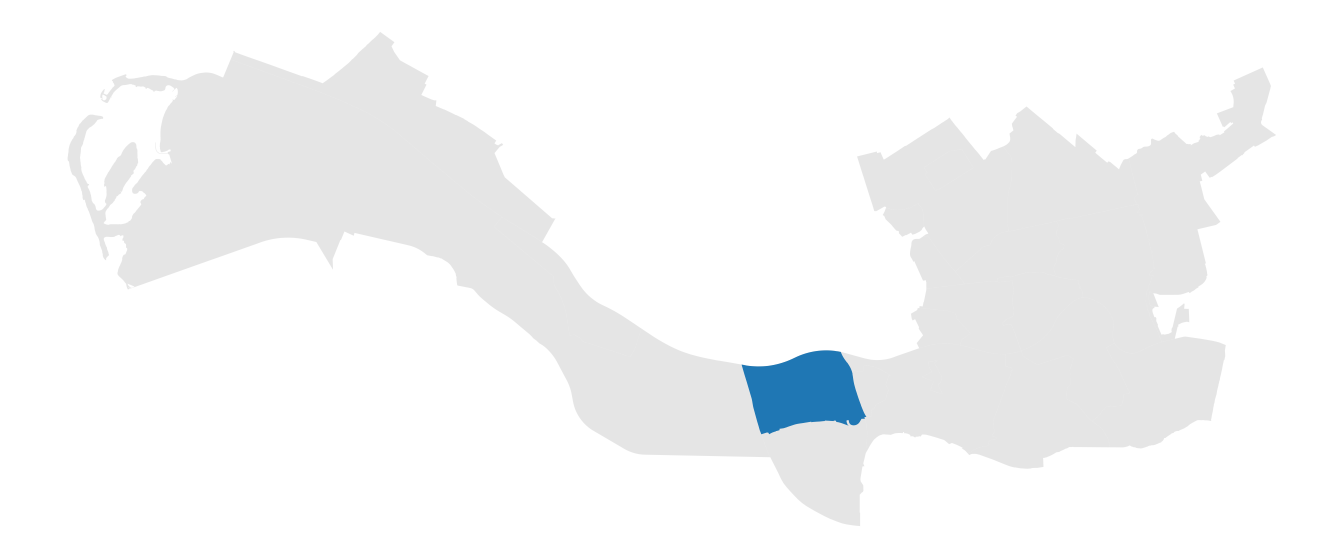

Wijk: Botlek-Europoort-Maasvlakte


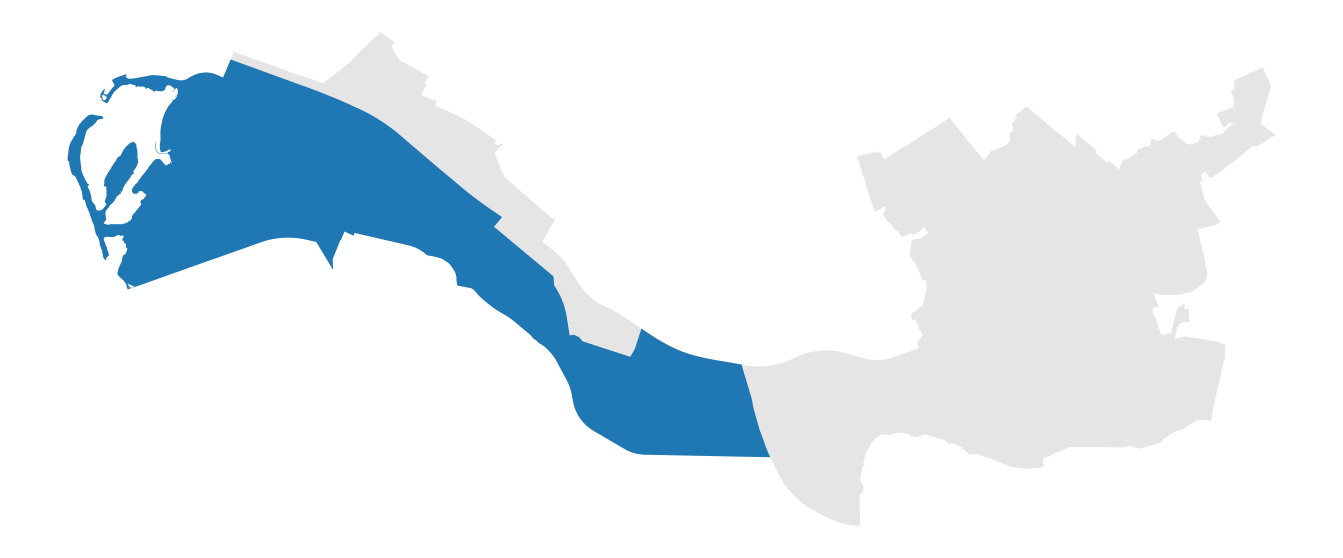

Wijk: Rotterdam-Noord-West


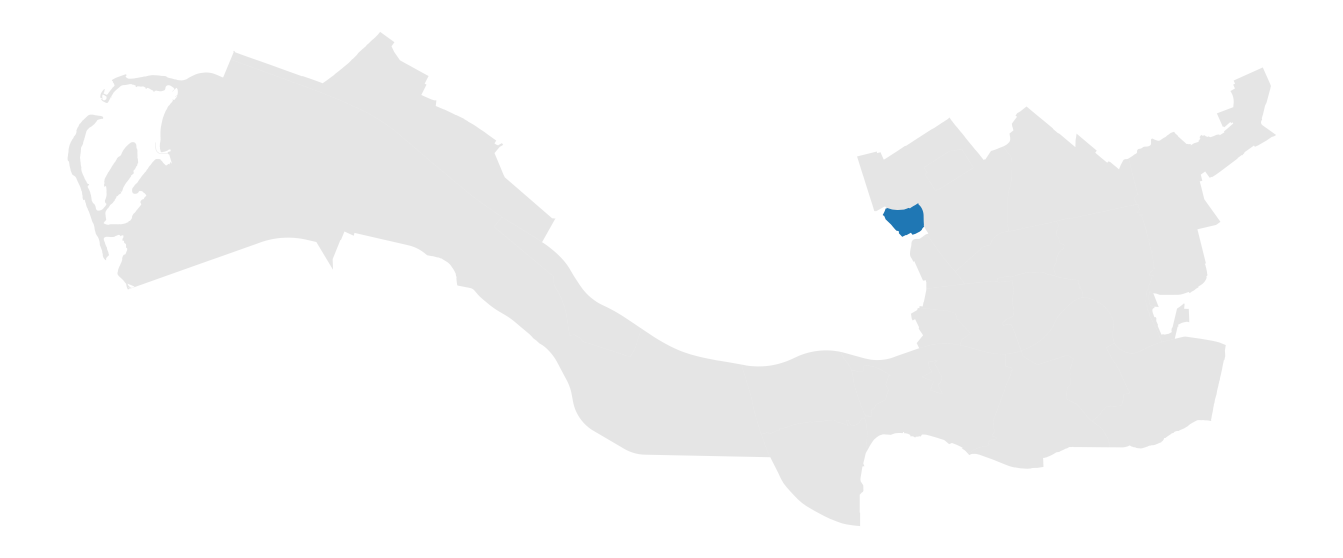

Wijk: Rivium


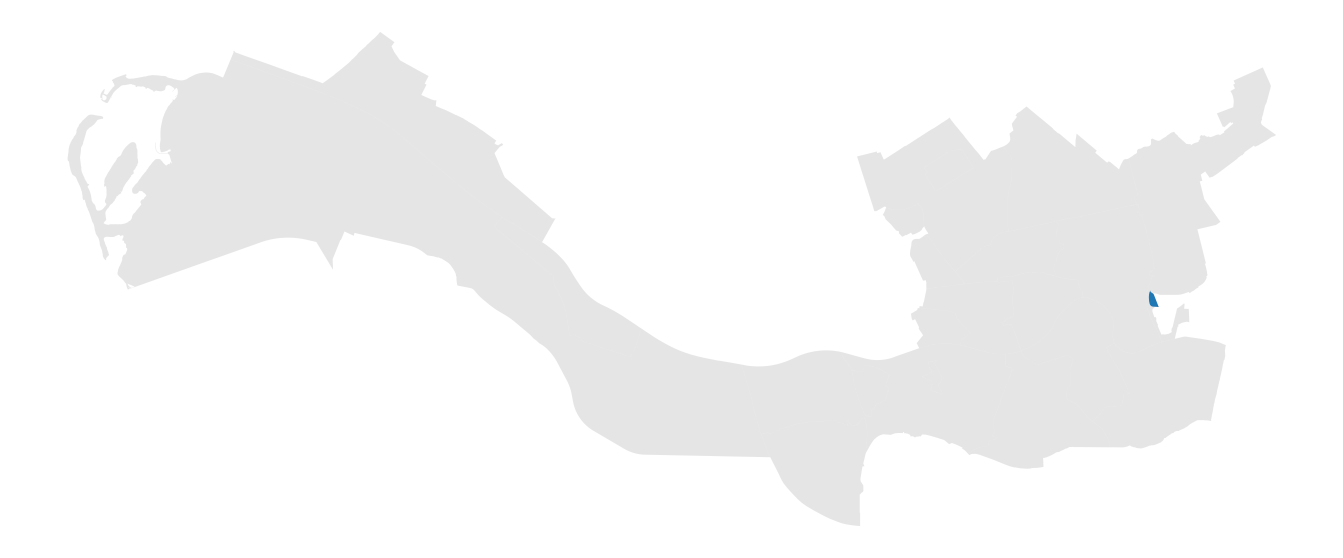

Wijk: Bedrijventerrein Schieveen


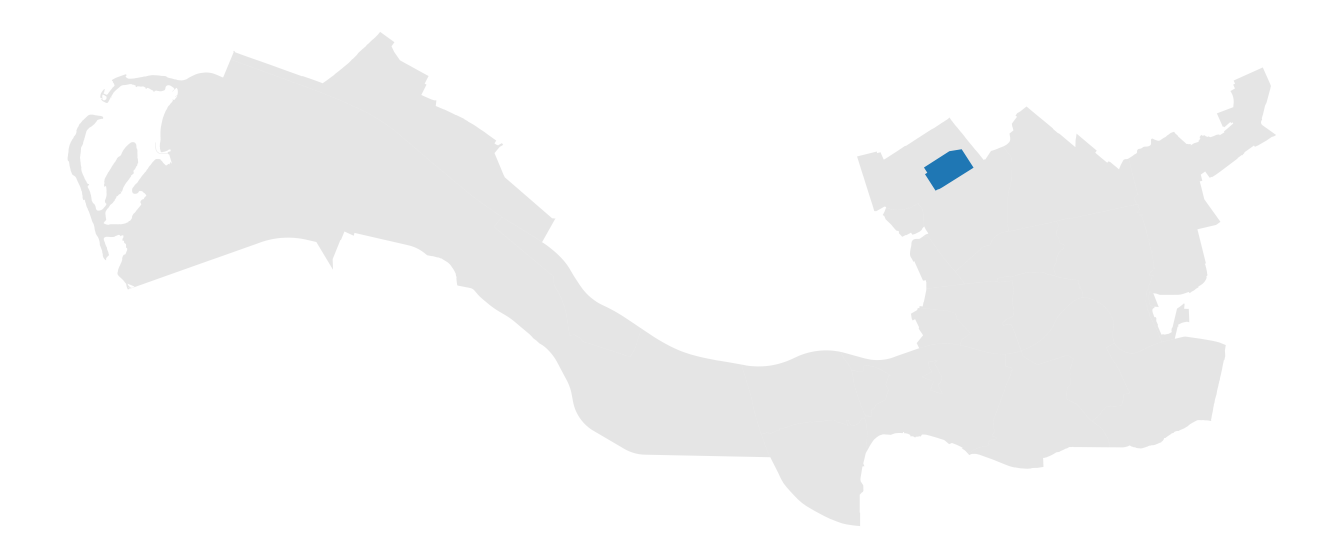

Wijk: Rozenburg


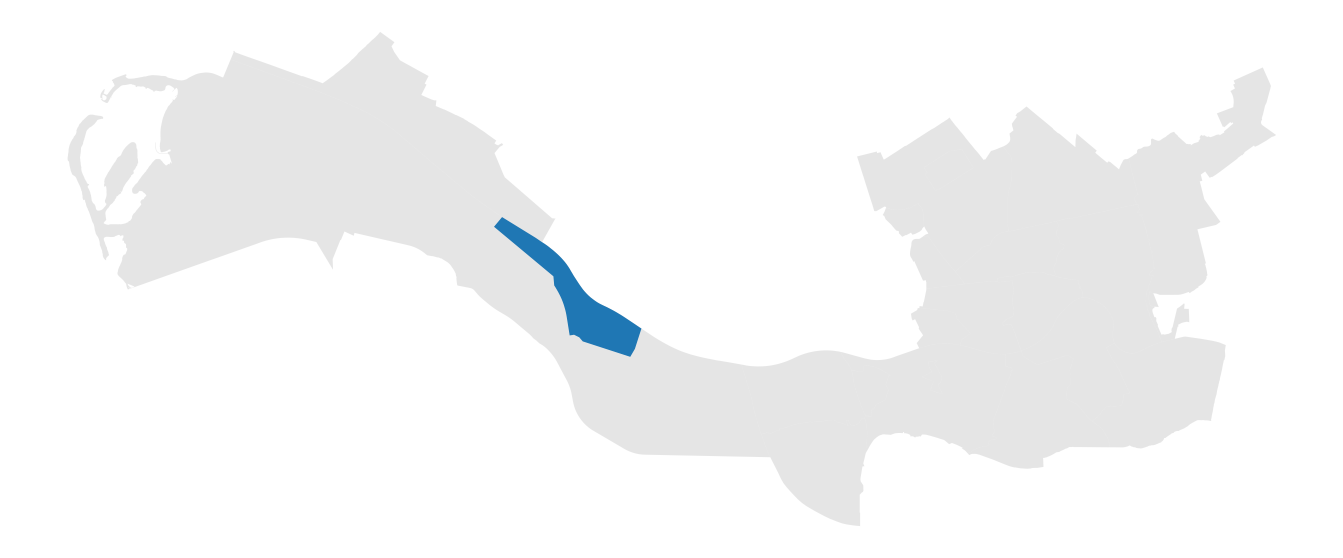

In [8]:
# Show wijken + name
wijken_list = wijken_rotterdam_rd.WK_NAAM.tolist()

for i in wijken_list:
    print("Wijk: " + str(i))
    ax = wijken_rotterdam_rd.plot(figsize=(30,10), color="grey", alpha=0.2)
    part = wijken_rotterdam_rd[wijken_rotterdam_rd.WK_NAAM == i]
    part.plot(ax=ax)
    ax.set_axis_off()
    plt.show()
